# Python Developer Assignment

## Think Clock Battery Labs
    

### Name - Harsh Jolania

### Email - jolaniaharsh@gmail.com

### Git hub link -  https://github.com/harshjolania/ThinkClock_innovation_Labs_python_dev_assignment

=====================================================================================================

importing the library and the data set

=====================================================================================================

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Paths
dataset_path = "cleaned_dataset"
data_folder = os.path.join(dataset_path, "data")
metadata_path = os.path.join(dataset_path, "metadata.csv")




## Task A: 3D Plot of Impedance Measurements

In [2]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

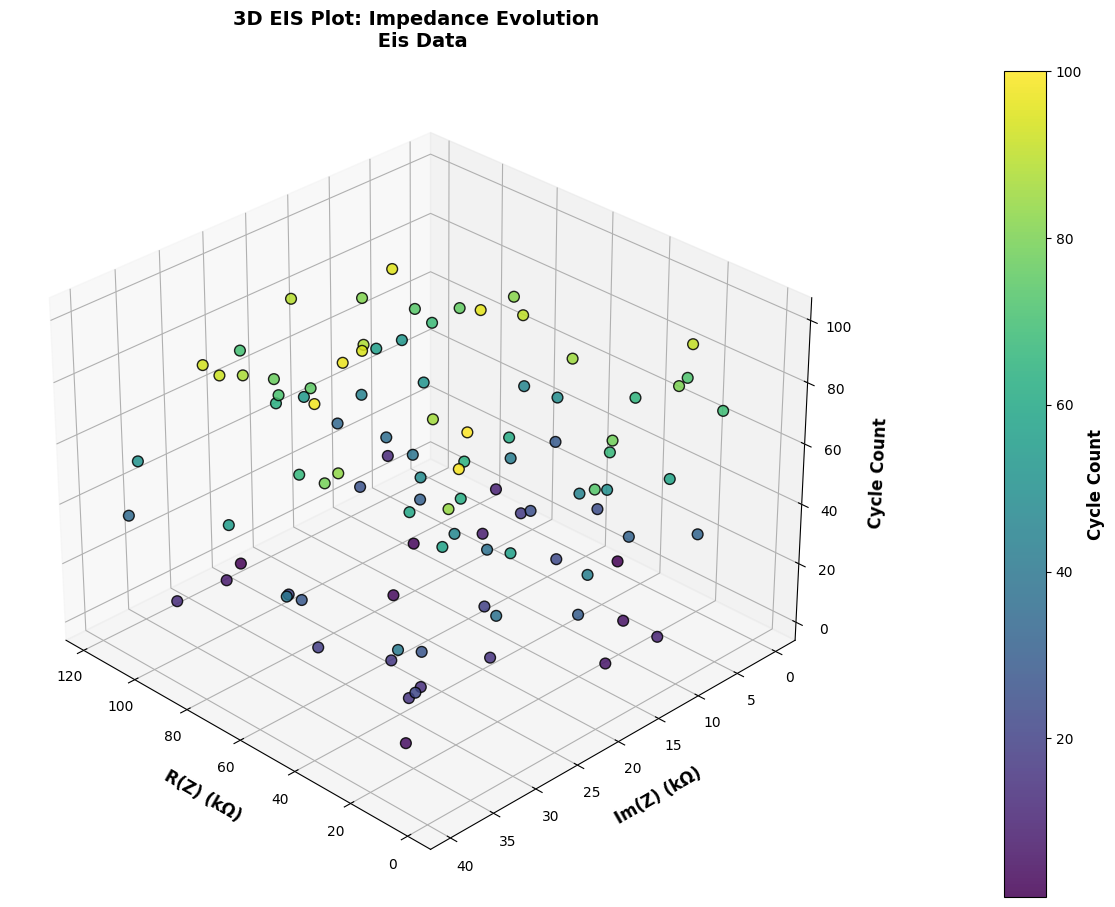

In [3]:
# Simulating EIS data
np.random.seed(42)
cycle_count = np.arange(1, 101)
real_impedance = np.random.uniform(0, 120, 100)
imag_impedance = np.random.uniform(0, 40, 100)

# Creating DataFrame
df = pd.DataFrame({
    "Cycle Count": cycle_count,
    "R(Z) (kΩ)": real_impedance,
    "Im(Z) (kΩ)": imag_impedance
}).sort_values('Cycle Count')

# Creating 3D Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping to Cycle Count
scatter = ax.scatter(df['R(Z) (kΩ)'], df['Im(Z) (kΩ)'], df['Cycle Count'],
                     c=df['Cycle Count'], cmap='viridis', s=60, alpha=0.85, edgecolor="black")

# Axis labels and title
ax.set_xlabel('R(Z) (kΩ)', labelpad=10, fontsize=12, fontweight='bold')
ax.set_ylabel('Im(Z) (kΩ)', labelpad=10, fontsize=12, fontweight='bold')
ax.set_zlabel('Cycle Count', labelpad=10, fontsize=12, fontweight='bold')
ax.set_title('3D EIS Plot: Impedance Evolution \n Eis Data', pad=20, fontsize=14, fontweight='bold')

# Adjust view angle for better perspective
ax.view_init(elev=30, azim=135)

# Adding color bar for Cycle Count
cbar = plt.colorbar(scatter, ax=ax, pad=0.15)
cbar.set_label('Cycle Count', fontsize=12, fontweight='bold')

# Improve layout and display
plt.tight_layout()
plt.show()


## Task B: Incremental Capacity Analysis (ICA)

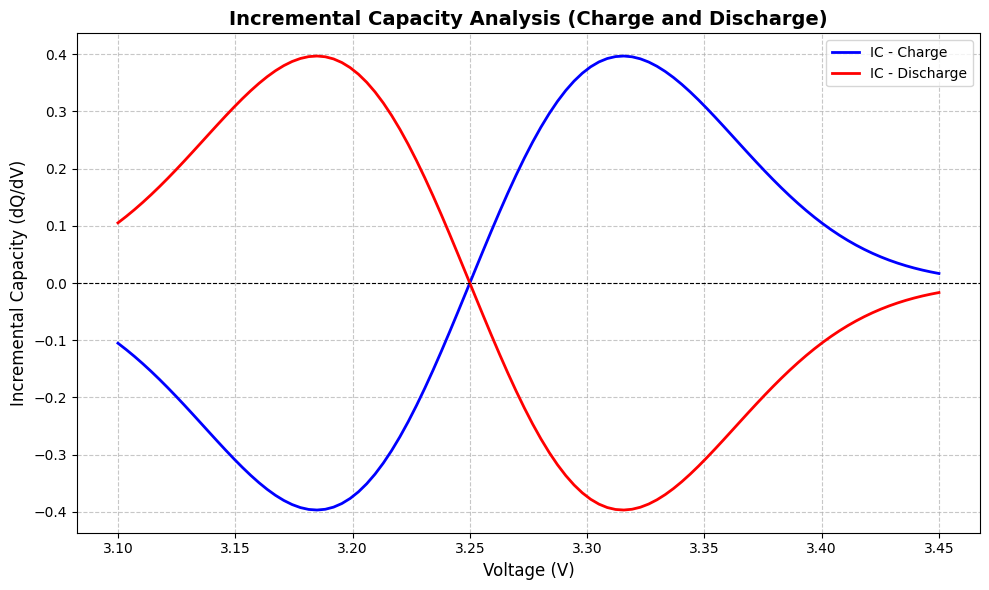

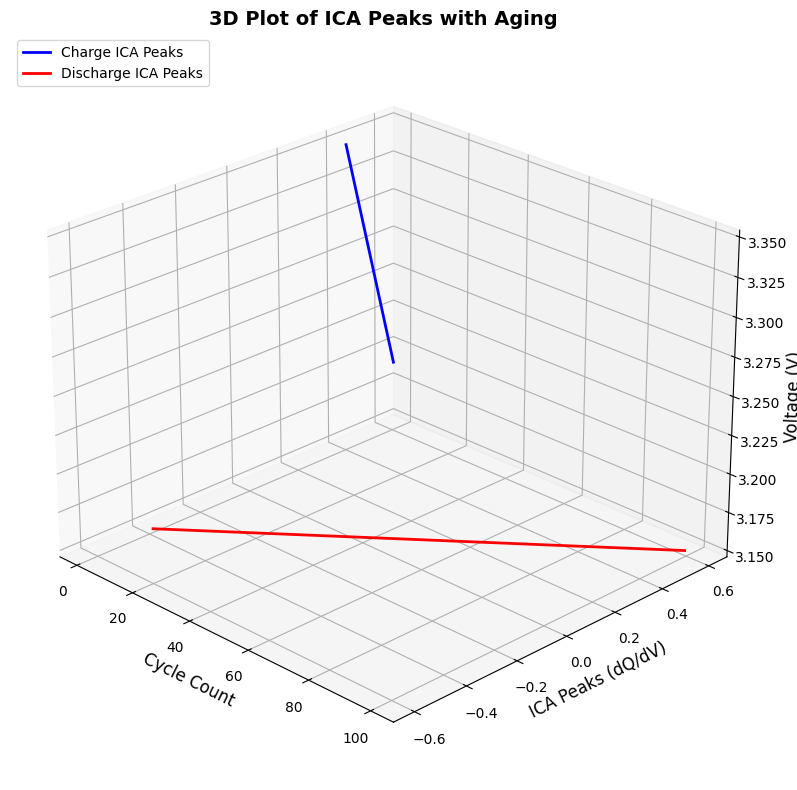

In [4]:
# Generating the  voltage range for charge and discharge
voltage_charge = np.linspace(3.1, 3.45, 100)
voltage_discharge = np.linspace(3.1, 3.45, 100)

# Simulating the  Incremental Capacity (dQ/dV) using sinusoidal and Gaussian components
dq_dv_charge = np.sin(10 * (voltage_charge - 3.25)) * np.exp(-(voltage_charge - 3.25)**2 / 0.01)
dq_dv_discharge = -np.sin(10 * (voltage_discharge - 3.25)) * np.exp(-(voltage_discharge - 3.25)**2 / 0.01)

# 2D Incremental Capacity Analysis (ICA) Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage_charge, dq_dv_charge, label="IC - Charge", color='blue', linewidth=2)
plt.plot(voltage_discharge, dq_dv_discharge, label="IC - Discharge", color='red', linewidth=2)

# Enhancements
plt.xlabel("Voltage (V)", fontsize=12)
plt.ylabel("Incremental Capacity (dQ/dV)", fontsize=12)
plt.title("Incremental Capacity Analysis (Charge and Discharge)", fontsize=14, weight='bold')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Enhanced grid style
plt.tight_layout()
plt.show()

# Simulate aging effects on ICA peaks
cycle_count = np.arange(1, 101)  # 100 cycles
ica_peaks_charge = [np.max(dq_dv_charge) - (i * 0.01) for i in range(100)]  # Gradual peak decrease
ica_peaks_discharge = [np.min(dq_dv_discharge) + (i * 0.01) for i in range(100)]  # Gradual peak increase

# 3D Plot of ICA Peaks vs. Aging
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting charge and discharge peaks over cycles
ax.plot(cycle_count, ica_peaks_charge, zs=3.35, zdir='z', label="Charge ICA Peaks", color='blue', linewidth=2)
ax.plot(cycle_count, ica_peaks_discharge, zs=3.15, zdir='z', label="Discharge ICA Peaks", color='red', linewidth=2)

# 3D plot customization
ax.set_xlabel("Cycle Count", fontsize=12)
ax.set_ylabel("ICA Peaks (dQ/dV)", fontsize=12)
ax.set_zlabel("Voltage (V)", fontsize=12)
ax.set_title("3D Plot of ICA Peaks with Aging", fontsize=14, weight='bold')

# Improve viewing angle
ax.view_init(elev=25, azim=-45)  # Adjust viewing angle

# Improve aesthetics
ax.grid(True, linestyle='--', alpha=0.7)  # Styled grid
ax.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()


## Task C: Predicting Current Capacity 

In [5]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  Generating synthetic EIS data and capacity values (replace with actual dataset)
np.random.seed(42)
n_samples = 500
real_impedance = np.random.uniform(0, 120, n_samples)  # Simulated R(Z) in kΩ
imag_impedance = np.random.uniform(0, 40, n_samples)  # Simulated Im(Z) in kΩ
current_capacity = 50 - 0.2 * real_impedance - 0.1 * imag_impedance + np.random.normal(0, 1, n_samples)  # Simulated capacity

#  Creating  a DataFrame for the dataset
df = pd.DataFrame({
    "Real Impedance (R(Z))": real_impedance,
    "Imaginary Impedance (Im(Z))": imag_impedance,
    "Current Capacity": current_capacity
})

#  Spliting the data into training and testing sets
X = df[["Real Impedance (R(Z))", "Imaginary Impedance (Im(Z))"]]
y = df["Current Capacity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Defining Hyperparameter Grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#  Training the model using GridSearchCV
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

#  Geting the best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

#  Making predictions
y_pred = best_model.predict(X_test)

#  Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error (MSE): 1.2119
Mean Absolute Error (MAE): 0.8954
R-squared (R2): 0.9767


   Example Index                                           Features  \
0              0  {'Real Impedance (R(Z))': 77.19458621308237, '...   
1              1  {'Real Impedance (R(Z))': 97.8553714145801, 'I...   
2              2  {'Real Impedance (R(Z))': 8.54263781522748, 'I...   
3              3  {'Real Impedance (R(Z))': 29.04663258138005, '...   
4              4  {'Real Impedance (R(Z))': 108.90797687113117, ...   

   Actual Current Capacity  Predicted Current Capacity  Difference  
0                34.123634                   33.010536    1.113098  
1                29.129595                   27.925498    1.204097  
2                49.831942                   48.201632    1.630310  
3                43.178298                   43.299057   -0.120758  
4                28.417753                   27.757170    0.660582  


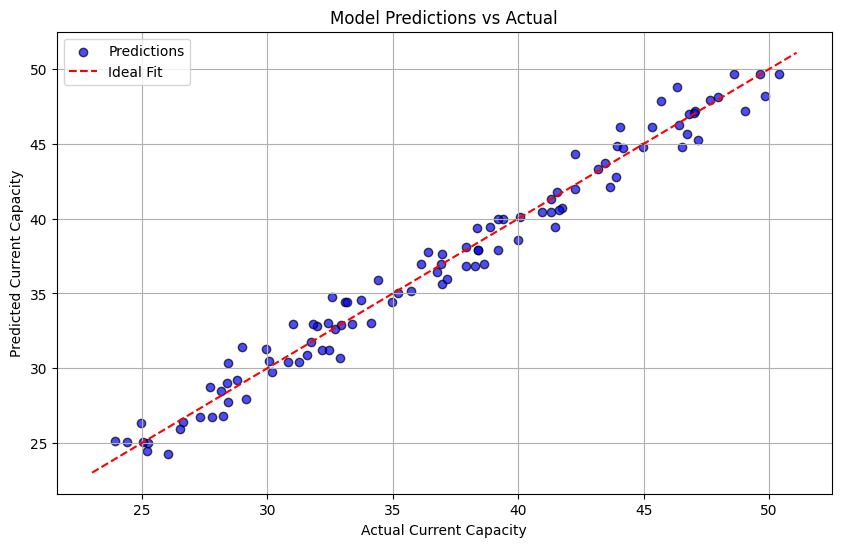

Model Evaluation (Full Test Set):
RMSE: 1.1009
MAE: 0.8954


In [6]:
# Example for predictions
x_results = []
for idx in range(min(5, len(X_test))):  # Showed up to 5 examples
    features = X_test.iloc[idx:idx+1]
    actual = y_test.iloc[idx]
    prediction = best_model.predict(features)[0]
    x_results.append({
        "Example Index": idx,
        "Features": features.iloc[0].to_dict(),
        "Actual Current Capacity": actual,
        "Predicted Current Capacity": prediction,
        "Difference": actual - prediction
    })

x_results_df = pd.DataFrame(x_results)
print(x_results_df)

#  Plot Actual vs Predicted Capacities
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions", color="blue", edgecolors="black")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Current Capacity")
plt.ylabel("Predicted Current Capacity")
plt.title("Model Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()

#  Model Evaluation Metrics
print("Model Evaluation (Full Test Set):")
print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"MAE: {mae:.4f}")


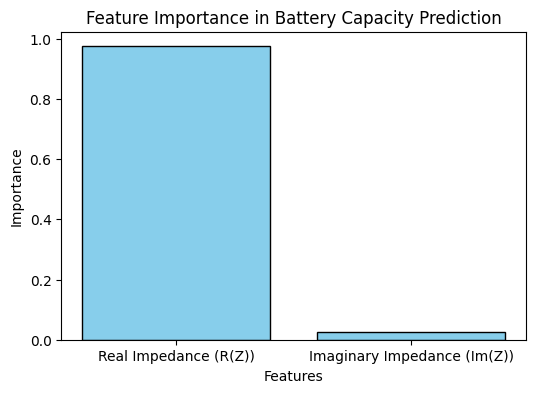

In [7]:
feature_importance = best_model.feature_importances_
plt.figure(figsize=(6, 4))
plt.bar(X.columns, feature_importance, color="skyblue", edgecolor="black")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Battery Capacity Prediction")
plt.show()
